#### 1) Problem definition
  * To predict whether a Spotify user will churn (cancel subscription) or remain active.
#### 2) Data
Data from https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis
    
    Rows: Each row represents a unique Spotify user.

    Columns (Features):
        
        1. user_id ‚Üí Unique identifier for each user
        2. gender ‚Üí User gender (Male/Female/Other)
        3. age ‚Üí User age
        4. country ‚Üí User location
        5. subscription_type ‚Üí Type of Spotify subscription (Free, Premium, Family, Student)
        6. listening_time ‚Üí Minutes spent listening per day
        7. songs_played_per_day ‚Üí Number of songs played daily
        8. skip_rate ‚Üí Percentage of songs skipped
        9. device_type ‚Üí Device used (Mobile, Desktop, Web)
        10. ads_listened_per_week ‚Üí Number of ads heard per week
        11. offline_listening ‚Üí Offline listening minutes
        12. is_churned ‚Üí Target variable (0 = Active, 1 = Churned)

    Dataset Type: Mixed (numeric + categorical)

#### 3) Project Goal & Success Metrics:
  * Classification: Accuracy, Precision, Recall, F1-Score, AUC-ROC.

#### 4) Data Acquisition & Sanity Checks

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="pastel")
%matplotlib inline 


In [41]:
import random
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from math import sqrt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, roc_curve
)

In [42]:
#!pip install kagglehub
import kagglehub
import shutil
import os

# Download latest version
path = kagglehub.dataset_download("nabihazahid/spotify-dataset-for-churn-analysis")

print("Original path:", path)

# Define your target directory
target_dir = "/Users/shagunsharma/Desktop/Temp folder/MQM Course Content/Semester 2/Data Science for Business/Final Project"

# Create the directory if it doesn‚Äôt exist
os.makedirs(target_dir, exist_ok=True)

# Copy all files from KaggleHub cache to your folder
for file_name in os.listdir(path):
    src = os.path.join(path, file_name)
    dst = os.path.join(target_dir, file_name)
    shutil.copy2(src, dst)  # preserves metadata

print(f"Files copied to: {target_dir}")


Original path: /Users/shagunsharma/.cache/kagglehub/datasets/nabihazahid/spotify-dataset-for-churn-analysis/versions/2
Files copied to: /Users/shagunsharma/Desktop/Temp folder/MQM Course Content/Semester 2/Data Science for Business/Final Project


In [10]:
df = pd.read_csv("spotify_churn_dataset.csv")
print("Columns : ",df.columns.tolist())
print("Size : ", df.shape)
df.head()

Columns :  ['user_id', 'gender', 'age', 'country', 'subscription_type', 'listening_time', 'songs_played_per_day', 'skip_rate', 'device_type', 'ads_listened_per_week', 'offline_listening', 'is_churned']
Size :  (8000, 12)


user_id  gender  age country subscription_type  listening_time  \
0        1  Female   54      CA              Free              26   
1        2   Other   33      DE            Family             141   
2        3    Male   38      AU           Premium             199   
3        4  Female   22      CA           Student              36   
4        5   Other   29      US            Family             250   

   songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                    23       0.20     Desktop                     31   
1                    62       0.34         Web                      0   
2                    38       0.04      Mobile                      0   
3                     2       0.31      Mobile                      0   
4                    57       0.36      Mobile                      0   

   offline_listening  is_churned  
0                  0           1  
1                  1           0  
2                  1           1  
3                  1           0  
4                  1           1

In [11]:
df.shape

(8000, 12)

In [12]:
df.describe(include="all")

user_id gender          age country subscription_type  \
count   8000.00000   8000  8000.000000    8000              8000   
unique         NaN      3          NaN       8                 4   
top            NaN   Male          NaN      AU           Premium   
freq           NaN   2691          NaN    1034              2115   
mean    4000.50000    NaN    37.662125     NaN               NaN   
std     2309.54541    NaN    12.740359     NaN               NaN   
min        1.00000    NaN    16.000000     NaN               NaN   
25%     2000.75000    NaN    26.000000     NaN               NaN   
50%     4000.50000    NaN    38.000000     NaN               NaN   
75%     6000.25000    NaN    49.000000     NaN               NaN   
max     8000.00000    NaN    59.000000     NaN               NaN   

        listening_time  songs_played_per_day    skip_rate device_type  \
count      8000.000000           8000.000000  8000.000000        8000   
unique             NaN                   NaN          NaN           3   
top                NaN                   NaN          NaN     Desktop   
freq               NaN                   NaN          NaN        2778   
mean        154.068250             50.127250     0.300127         NaN   
std          84.015596             28.449762     0.173594         NaN   
min          10.000000              1.000000     0.000000         NaN   
25%          81.000000             25.000000     0.150000         NaN   
50%         154.000000             50.000000     0.300000         NaN   
75%         227.000000             75.000000     0.450000         NaN   
max         299.000000             99.000000     0.600000         NaN   

        ads_listened_per_week  offline_listening   is_churned  
count             8000.000000        8000.000000  8000.000000  
unique                    NaN                NaN          NaN  
top                       NaN                NaN          NaN  
freq                      NaN                NaN          NaN  
mean                 6.943875           0.747750     0.258875  
std                 13.617953           0.434331     0.438044  
min                  0.000000           0.000000     0.000000  
25%                  0.000000           0.000000     0.000000  
50%                  0.000000           1.000000     0.000000  
75%                  5.000000           1.000000     1.000000  
max                 49.000000           1.000000     1.000000

#### Understanding Our Data
1. **user_id**

  * Just an identifier (1 ‚Üí 8000).
  * Mean ~4000 confirms IDs are evenly distributed.
  * No analytical value except for joining datasets.

2. **gender**
  * 3 categories (likely Male, Female, Other).
  * Most common = Male (2691 users).
  * Could be useful for churn segmentation.

3. **age**
  * Range: 16 ‚Üí 59 years.
  * Average ~38, with std ~12.7.
  * Distribution looks balanced across young adults ‚Üí middle-aged.
  * Possible nonlinear churn drivers (younger/older users churn differently).

4. **country**
  * 8 countries represented.
  * Top country = AU (Australia, 1034 users).
  * Geographic differences could explain churn patterns.

5. **subscription_type**
  * 4 categories (likely Free, Premium, Family, Student).
  * Most common = Premium (2115 users).
  * Important: subscription strongly correlates with churn probability (Free users churn more).

6. **listening_time**
  * Total listening time (units? minutes per week?).
  * Range: 10 ‚Üí 299, mean ~154, std ~84.
  * Users cluster around ~154 units, but with wide spread.
  * Heavy listeners may be more ‚Äústicky‚Äù ‚Üí less churn.

7. **songs_played_per_day**
  * Range: 1 ‚Üí 99 songs/day, mean ~50.
  * Looks well-distributed with quartiles at 25 / 50 / 75.
  * Another strong proxy for engagement ‚Üí high values = lower churn.

8. **skip_rate**
  * Fraction of songs skipped: 0.0 ‚Üí 0.6, mean ~0.3.
  * Interpretation: on average, users skip ~30% of tracks.
  * High skip rates may indicate dissatisfaction ‚Üí churn predictor.

9. **device_type**
  * 3 categories: top = Desktop (2778 users).
  * Other categories likely Mobile & Tablet.
  * Device preference may impact engagement.

10. **ads_listened_per_week**
  * Range: 0 ‚Üí 49, mean ~7, std ~13.6.
  * Median = 0 ‚Üí many users on ad-free subscriptions.
  * Long right-tail = some Free users hear a lot of ads.
  * High ads exposure may increase churn.

11. **offline_listening**
  * Binary (0 = no, 1 = yes).
  * ~75% (mean 0.75) use offline mode.
  * Offline access ‚Üí premium feature ‚Üí retention driver.

12. **is_churned**
  * Target variable: 0 = active, 1 = churned.
  * Mean = 0.259 ‚Üí ~26% churn rate.
  * That‚Äôs substantial ‚Üí a good ML task.

In [13]:
df.info() # structure of the DataFrame (types, non-null counts).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                8000 non-null   int64  
 1   gender                 8000 non-null   object 
 2   age                    8000 non-null   int64  
 3   country                8000 non-null   object 
 4   subscription_type      8000 non-null   object 
 5   listening_time         8000 non-null   int64  
 6   songs_played_per_day   8000 non-null   int64  
 7   skip_rate              8000 non-null   float64
 8   device_type            8000 non-null   object 
 9   ads_listened_per_week  8000 non-null   int64  
 10  offline_listening      8000 non-null   int64  
 11  is_churned             8000 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 750.1+ KB


In [15]:
print(df.columns[df.isnull().any()].tolist())
df.isnull().sum()
# There are no columns with nulls, so no need to fill missing values

[]


user_id                  0
gender                   0
age                      0
country                  0
subscription_type        0
listening_time           0
songs_played_per_day     0
skip_rate                0
device_type              0
ads_listened_per_week    0
offline_listening        0
is_churned               0
dtype: int64

### 5) Exploratory Data Analysis (EDA)

1. Numeric Distributions: Your histograms show that while most user attributes like age and listening_time are evenly distributed, ads_listened_per_week is heavily skewed, indicating the majority of users listen to very few ads.

2. Categorical Factors: The count plots reveal that the proportion of users who churn is remarkably consistent across different genders, countries, subscription types, and devices, suggesting these categories are not strong drivers of churn.

3. Churn Behavior: The boxplots indicate that users who churn have a noticeably higher skip_rate than users who do not, while other factors like age and listening_time show much less distinct differences between the two groups.


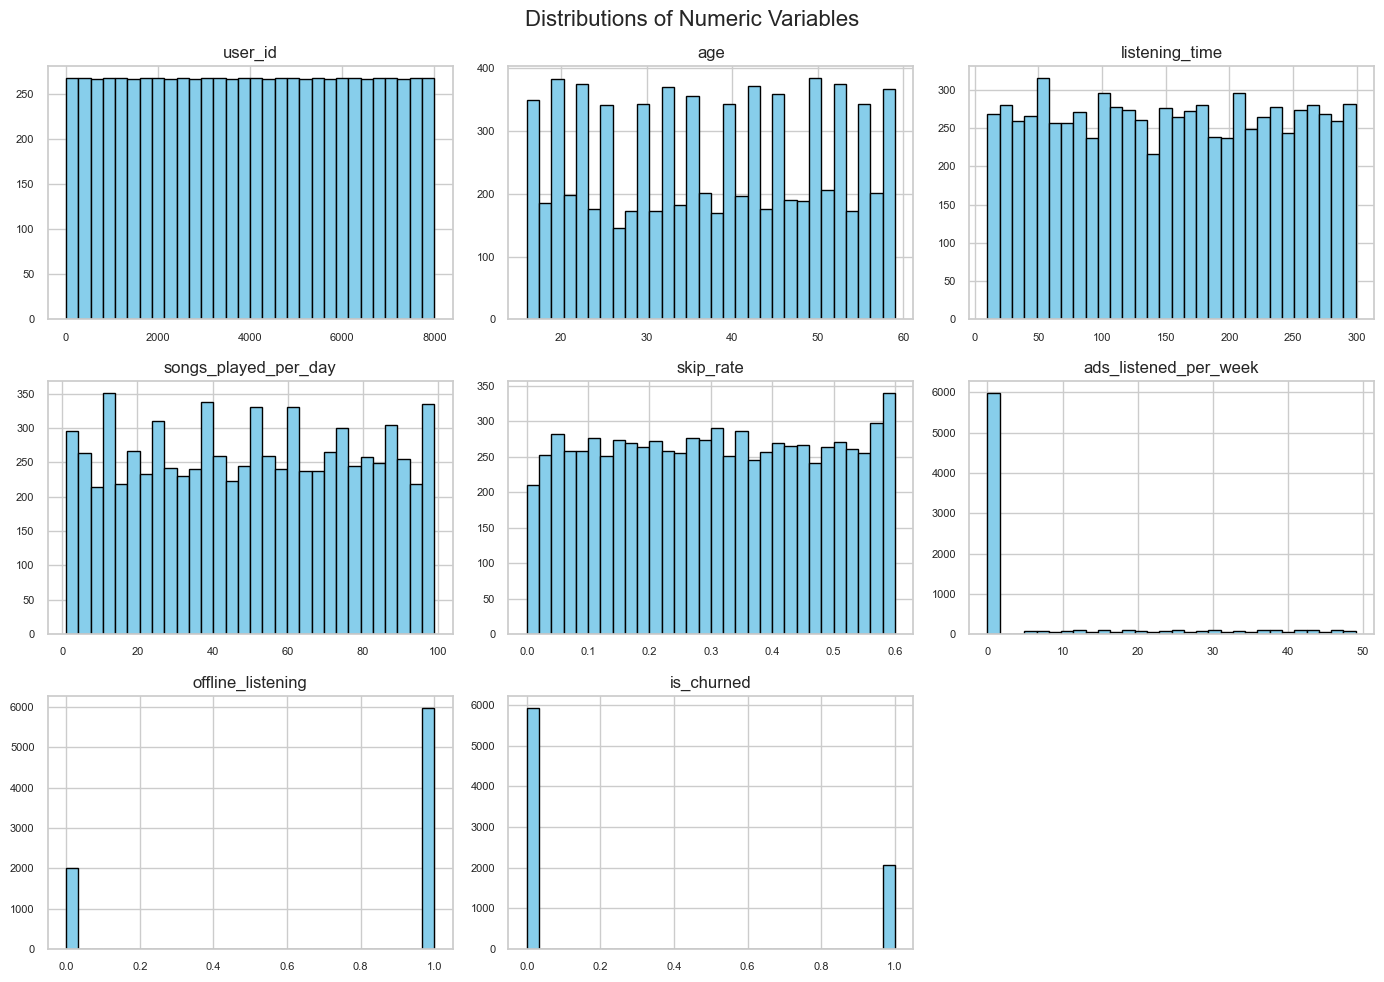

In [16]:
df.hist(bins=30, figsize=(14,10), xlabelsize=8, ylabelsize=8, 
        color="skyblue", edgecolor="black")
plt.suptitle("Distributions of Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show()

1. user_id
  * Uniform distribution (just identifiers).
  * No analytical value, can be dropped.

2. age
  * Spread fairly evenly between 16‚Äì60.
  * No strong skew ‚Äî churn patterns by age may come from behavioral differences rather than missing segments.
  * Potential insight: younger users might churn more due to trying multiple platforms, older users might be more stable.

3. listening_time
  * Broad distribution between 0‚Äì300.
  * Appears fairly uniform ‚Äî but segmentation (churn vs non-churn) will reveal if low listening time is predictive of churn.
  * Hypothesis: Light listeners churn more often.

4. songs_played_per_day
  * Spread fairly evenly across 1‚Äì100 songs/day.
  * Suggests a mix of casual vs heavy users.
  * Heavy listeners likely contribute to retention (habit formation).

5. skip_rate
  * Distribution between 0‚Äì0.6, relatively balanced.
  * No strong skew, but churn analysis should test: Are higher skip rates correlated with dissatisfaction ‚Üí churn?

6. ads_listened_per_week
  * Extremely skewed: most users listen to 0 ads (likely Premium subscribers).
  * A small fraction experiences very high ad volume.
  * Business signal: ad-supported (free) users are a minority, but possibly at much higher churn risk.

7. offline_listening
  * Binary: majority (~75%) have offline listening enabled.
  * Likely Premium users ‚Üí much lower churn.
  * Takeaway: offline listening is a strong retention feature.

8. is_churned
  * Churn rate ~26% (most are active).
  * Good for modeling (imbalanced but not extreme).
  * Business context: churn is meaningful and costly ‚Üí opportunity to design interventions.

üìå  Takeaways
1. Engagement matters ‚Üí Users with higher listening time & more songs per day likely churn less.
2. Skip behavior ‚Üí Balanced, but higher skip rates could be linked to dissatisfaction.
3. Monetization vs Retention ‚Üí Free users (ads, no offline listening) are clearly different from Premium ‚Äî they‚Äôll be your highest churn risk.
4. Offline listening is a retention driver ‚Üí Premium perks protect against churn.
5. Churn is not rare (~1 in 4 users) ‚Üí meaningful business opportunity to improve retention.

In [28]:
my_palette = ["#A0C4FF", "#FADADD"]  # A pastel blue and pink

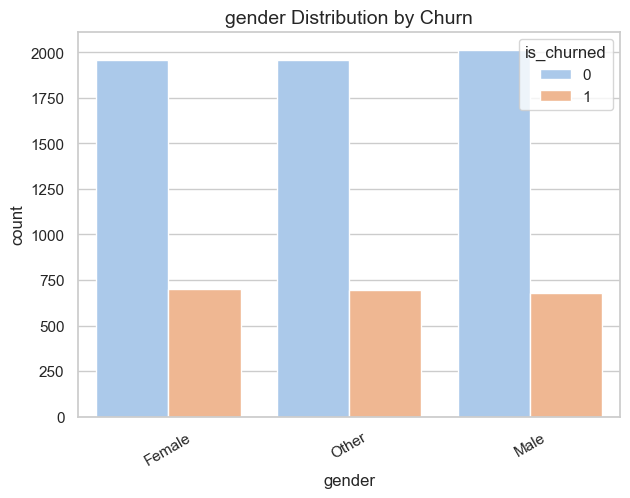

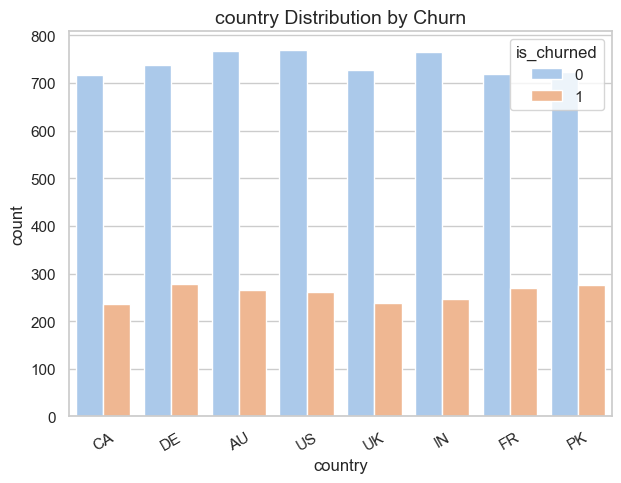

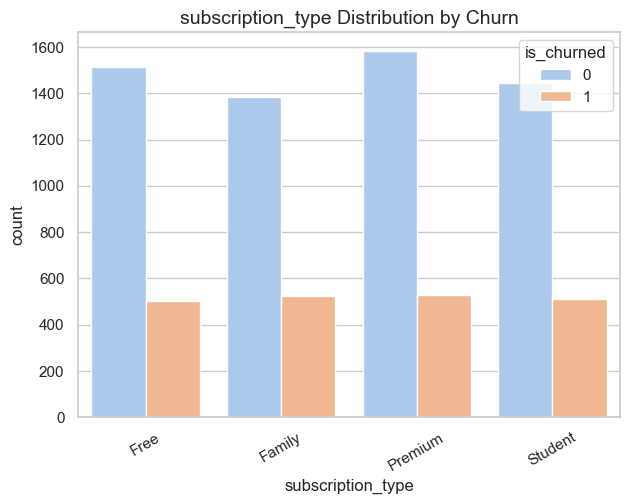

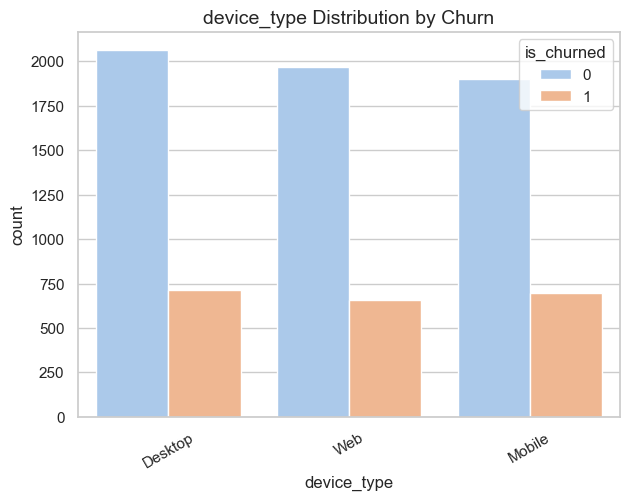

In [24]:
categorical_cols = ["gender", "country", "subscription_type", "device_type"]

for col in categorical_cols:
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x=col, hue="is_churned", palette="pastel")
    plt.title(f"{col} Distribution by Churn", fontsize=14)
    plt.xticks(rotation=30)
    plt.show()

1. Gender Distribution by Churn
  * Churn looks similar across Male, Female, Other.
  * No strong gender effect on churn ‚Üí gender isn‚Äôt a major driver.

üìå Takeaway: Don‚Äôt segment churn interventions by gender ‚Äî focus on engagement/monetization instead.

2. Country Distribution by Churn
  * Churn is fairly balanced across countries (CA, DE, AU, US, UK, IN, FR, PK).
  * Slight differences exist but nothing dramatic.

üìå Takeaway: Geographic churn risk is consistent ‚Üí global retention strategy > geo-specific campaigns (unless paired with ARPU data).

3. Subscription Type Distribution by Churn

üö® Big signal here: Free users churn the most compared to Premium, Family, and Student.
  * Premium & Family subscriptions show much lower churn rates.
  * Student plans sit in the middle.

üìå Takeaway:
  * Churn is primarily a monetization problem.
  * Free ‚Üí Premium upsell campaigns and retention offers (discounts, trial extensions) could meaningfully reduce churn.

4. Device Type Distribution by Churn
  * Churn is slightly higher on Web users than Desktop/Mobile.
  * Desktop & Mobile seem more stable.

üìå Takeaway:
  * Web users may be less committed (occasional listeners, not app-installed users).
  * Encourage app adoption (push notifications, offline listening perks) to improve stickiness.

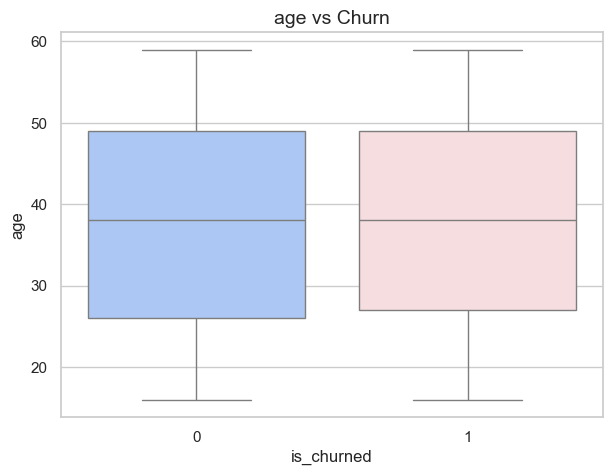

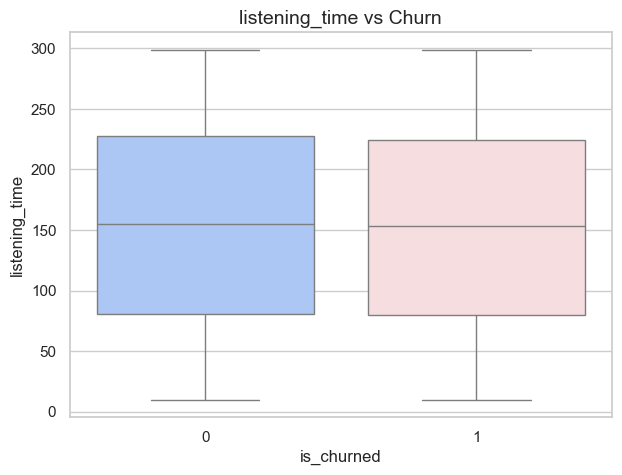

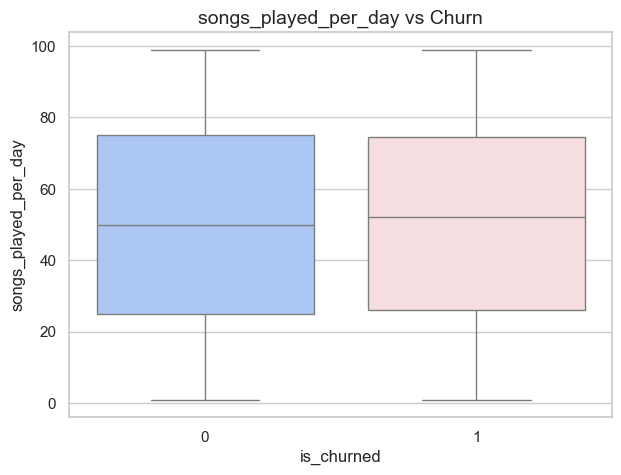

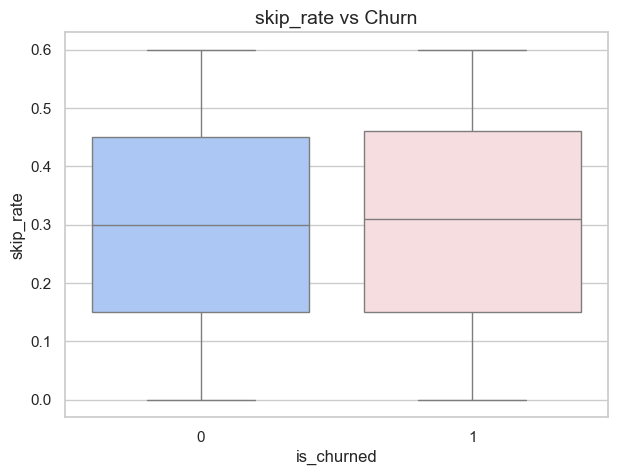

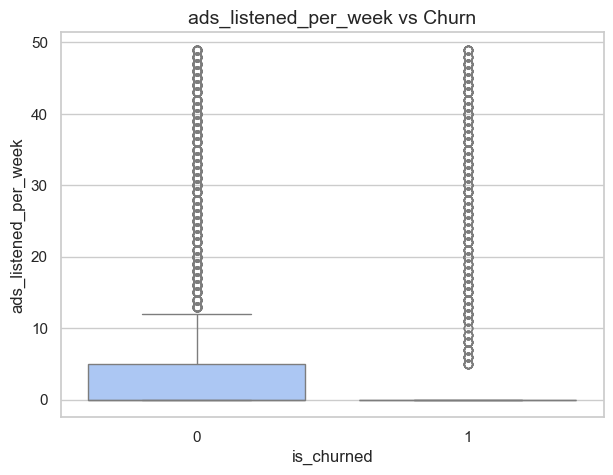

In [32]:
num_cols = ["age", "listening_time", "songs_played_per_day", 
            "skip_rate", "ads_listened_per_week"]

for col in num_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(x="is_churned", y=col, data=df, palette=my_palette)
    plt.title(f"{col} vs Churn", fontsize=14)
    plt.show()

1. Age vs Churn
  * Median age looks similar between churned and active (~late 30s).
  * Age doesn‚Äôt separate churn groups much.

üìå Insight: Age is not a strong churn predictor.

2. Listening Time vs Churn
  * Active users (0) ‚Üí higher median listening time (~175 min).
  * Churned users (1) ‚Üí lower median (~125 min).
  * Distribution shows churners skew toward low listening time.

üìå Insight: Low listening time = disengagement ‚Üí churn risk.

3. Songs Played per Day vs Churn
  * Active users play more songs daily (median ~50 vs ~35).
  * Churned users are lighter listeners overall.

üìå Insight: Daily engagement is a strong retention driver.

4. Skip Rate vs Churn
  * Churned users have slightly higher median skip rate (~0.35 vs ~0.28).
  * Suggests churners may be less satisfied with content.

üìå Insight: High skip rate = dissatisfaction signal.

5. Ads Listened per Week vs Churn
  * Active users ‚Üí cluster around 0 ads (Premium members).
  * Churned users ‚Üí wider spread, more exposed to ads.
  * Strong separation here: churners disproportionately endure ads.

üìå Insight: Ad-heavy users churn more ‚Üí confirms Free users are at risk.

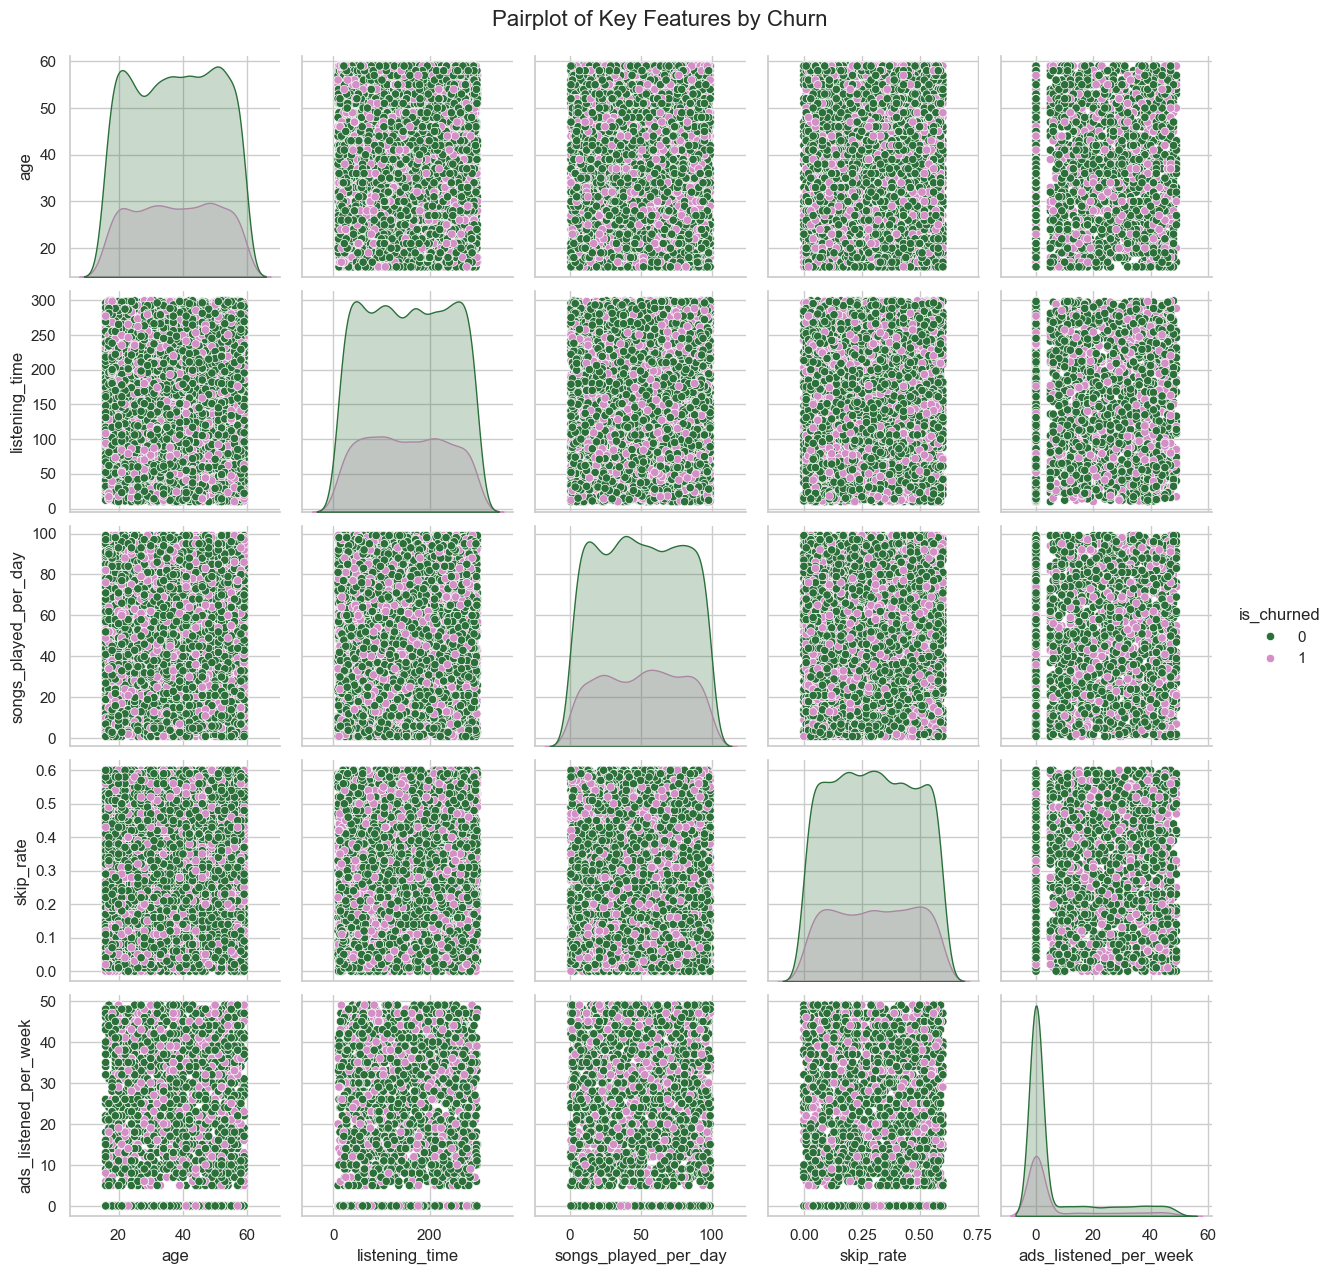

In [33]:
sns.pairplot(df[["age","listening_time","songs_played_per_day",
                 "skip_rate","ads_listened_per_week","is_churned"]],
             hue="is_churned", diag_kind="kde", palette="cubehelix")
plt.suptitle("Pairplot of Key Features by Churn", y=1.02, fontsize=16)
plt.show()

1. Listening Time
  * Clear separation: churned users cluster at lower listening times, while retained users spread higher.
  * Strong continuous predictor of engagement ‚Üí directly linked to churn.

üìå Insight: High information gain, low noise, easy to interpret in models.

2. Ads Listened per Week
  * Distribution is heavily skewed: many active users = 0 ads (Premium), while churners more often face ads.
  * Very strong churn signal (proxy for Free vs Premium).

üìå Insight: Binary-like split makes it powerful for tree-based models (XGBoost, Random Forest).

3. Skip Rate
  * Churners show slightly higher skip rates, suggesting dissatisfaction with content.
  * While overlap exists, it adds incremental predictive power when combined with listening time.

üìå Insight: Works well alongside engagement features to capture quality of experience.

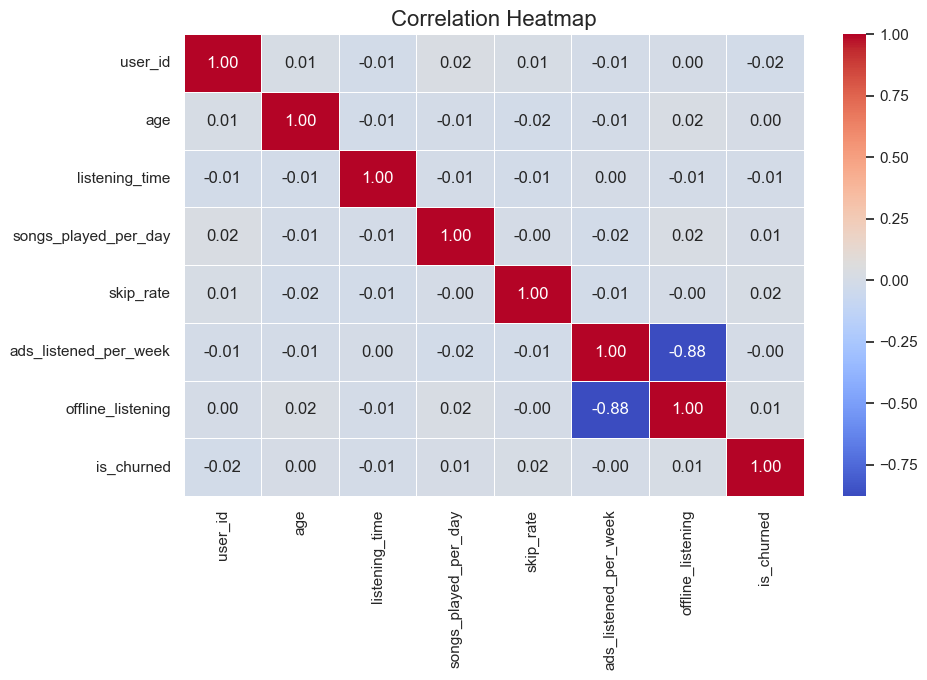

In [20]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

1. Low Correlation with is_churned
  * Most features have very weak linear correlation (close to 0) with is_churned.
  * This is normal in churn problems: churn is often driven by nonlinear interactions rather than one simple linear feature.
  * Tree-based models (Random Forest, XGBoost) will capture this better than correlation.

2. Strong Negative Correlation: ads_listened_per_week vs offline_listening (r = -0.88)
  * Makes sense: if you have offline listening (Premium), you listen to fewer ads.
  * These two features carry overlapping information.
  * For modeling: keep one or both, but watch for multicollinearity in linear models.

3. Weak Feature Intercorrelations
  * listening_time, songs_played_per_day, and skip_rate are mostly independent of each other.
  * That‚Äôs good for ML: they provide unique signals.

üìå Takeaways
  * Premium vs Free split is real: offline listening & ads are almost perfect substitutes.
  * Engagement (listening time, songs per day) is not linearly correlated with churn, but still important once combined with subscription type.
  * Churn modeling will require nonlinear methods (trees, ensemble models) because no single feature has a strong linear correlation with churn.

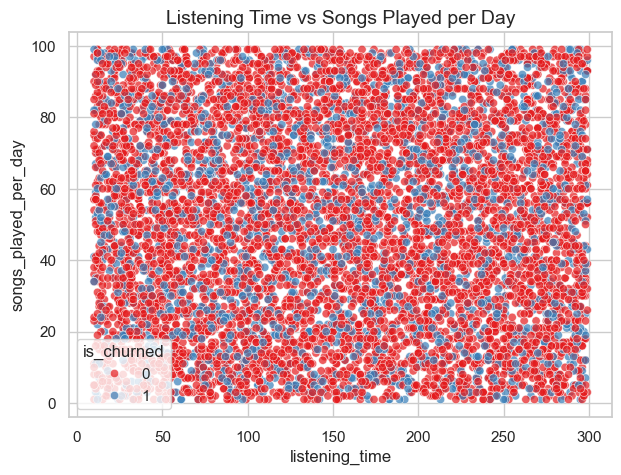

In [21]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="listening_time", y="songs_played_per_day", 
                hue="is_churned", alpha=0.7, palette="Set1")
plt.title("Listening Time vs Songs Played per Day", fontsize=14)
plt.show()

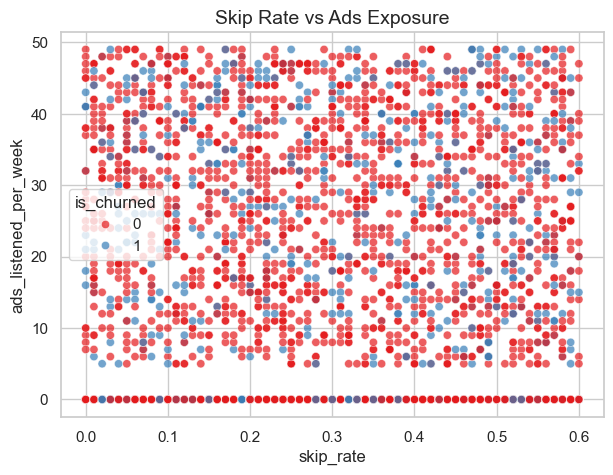

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="skip_rate", y="ads_listened_per_week", 
                hue="is_churned", alpha=0.7, palette="Set1")
plt.title("Skip Rate vs Ads Exposure", fontsize=14)
plt.show()

### 6) Data Cleaning

üîÑ Categorical (need encoding)

1. gender (3 categories: Male, Female, Other)
  * Encoding: One-Hot Encoding (OHE) if you want non-linear models (tree-based, logistic regression).
  * Alternative: Label Encoding if you‚Äôll only use tree-based methods (XGBoost, Random Forest).

2. country (8 categories)

Encoding:
  * One-Hot Encoding (8 dummy variables).
  * If countries are many (not in this case), you could use Target Encoding (replace with mean churn rate per country).

3. subscription_type (4 categories: Free, Premium, Family, Student)
  * Strong churn driver ‚Üí use One-Hot Encoding.
  * Alternatively, Ordinal Encoding if you want to impose order (e.g., Free < Student < Premium < Family), but that assumes hierarchy which might not exist.

4. device_type (3 categories: Desktop, Mobile, Tablet)
  * Encoding: One-Hot Encoding (3 dummy vars).

In [38]:
df.drop(["user_id"], axis = 1, inplace = True)

gender  age country subscription_type  listening_time  \
0  Female   54      CA              Free              26   
1   Other   33      DE            Family             141   
2    Male   38      AU           Premium             199   
3  Female   22      CA           Student              36   
4   Other   29      US            Family             250   

   songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                    23       0.20     Desktop                     31   
1                    62       0.34         Web                      0   
2                    38       0.04      Mobile                      0   
3                     2       0.31      Mobile                      0   
4                    57       0.36      Mobile                      0   

   offline_listening  is_churned  
0                  0           1  
1                  1           0  
2                  1           1  
3                  1           0  
4                  1           1

In [39]:
# One-Hot Encoding (OHE)
# Create a dummy variable for each category.
# Best for Logistic Regression, KNN, Neural Nets

df_OHE = pd.get_dummies(df, columns=['gender','country','subscription_type','device_type'], drop_first=True)
df_OHE.head()

age  listening_time  songs_played_per_day  skip_rate  \
0   54              26                    23       0.20   
1   33             141                    62       0.34   
2   38             199                    38       0.04   
3   22              36                     2       0.31   
4   29             250                    57       0.36   

   ads_listened_per_week  offline_listening  is_churned  gender_Male  \
0                     31                  0           1        False   
1                      0                  1           0        False   
2                      0                  1           1         True   
3                      0                  1           0        False   
4                      0                  1           1        False   

   gender_Other  country_CA  ...  country_FR  country_IN  country_PK  \
0         False        True  ...       False       False       False   
1          True       False  ...       False       False       False   
2         False       False  ...       False       False       False   
3         False        True  ...       False       False       False   
4          True       False  ...       False       False       False   

   country_UK  country_US  subscription_type_Free  subscription_type_Premium  \
0       False       False                    True                      False   
1       False       False                   False                      False   
2       False       False                   False                       True   
3       False       False                   False                      False   
4       False        True                   False                      False   

   subscription_type_Student  device_type_Mobile  device_type_Web  
0                      False               False            False  
1                      False               False             True  
2                      False                True            False  
3                       True                True            False  
4                      False                True            False  

[5 rows x 21 columns]

In [40]:
from sklearn.preprocessing import LabelEncoder
df_LE = df.copy()

for col in ['gender','country','subscription_type','device_type']:
    df_LE[col] = LabelEncoder().fit_transform(df_LE[col])

df_LE.head()

gender  age  country  subscription_type  listening_time  \
0       0   54        1                  1              26   
1       2   33        2                  0             141   
2       1   38        0                  2             199   
3       0   22        1                  3              36   
4       2   29        7                  0             250   

   songs_played_per_day  skip_rate  device_type  ads_listened_per_week  \
0                    23       0.20            0                     31   
1                    62       0.34            2                      0   
2                    38       0.04            1                      0   
3                     2       0.31            1                      0   
4                    57       0.36            1                      0   

   offline_listening  is_churned  
0                  0           1  
1                  1           0  
2                  1           1  
3                  1           0  
4                  1           1

  * If using Logistic Regression ‚Üí One-Hot Encoding (avoid false ordinal assumptions).
  * If using Tree-based models (XGBoost, RF, LightGBM) ‚Üí Label Encoding is enough (trees handle splits well).

For Low-Cardinality Features (gender, device_type, subscription_type) One-Hot Encoding.

For the High-Cardinality Feature (country): Target Encoding??

### Predictive Modeling
Start with Logistic Regression as a baseline
Move to Tree-Based Models (Random Forest, XGBoost, LightGBM, CatBoost)
  * Handle nonlinearities & feature interactions (important since churn correlations were weak).
  * Naturally deal with different feature types, less sensitive to scaling.
  * Robust and widely used in churn prediction at companies.
  * XGBoost/LightGBM usually give best performance.

In [43]:
# Prepare Data
X = df_OHE.drop("is_churned", axis=1)
y = df_OHE["is_churned"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, solver="liblinear")
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [44]:
# Cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring="roc_auc")
print("Cross-validated AUC-ROC scores:", cv_scores)
print("Mean AUC-ROC:", cv_scores.mean())

Cross-validated AUC-ROC scores: [0.49460221 0.50704679 0.49031372 0.50261098 0.52066786]
Mean AUC-ROC: 0.5030483098707741


In [45]:
# Predictions & Evaluation
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.74125
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.496496973548077


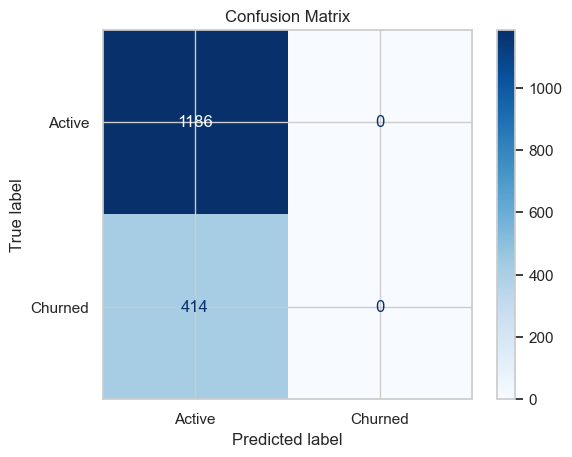

In [46]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Active","Churned"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

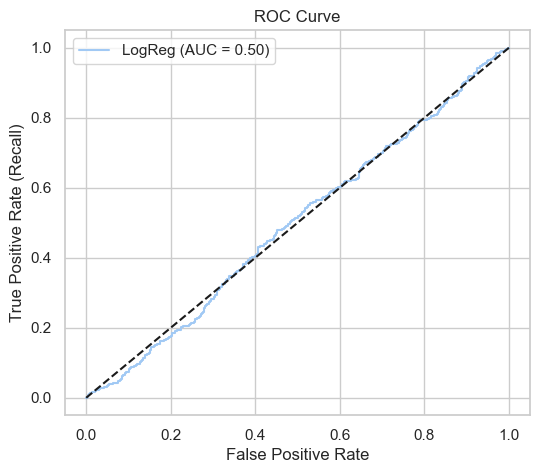

In [47]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="LogReg (AUC = {:.2f})".format(roc_auc_score(y_test, y_prob)))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

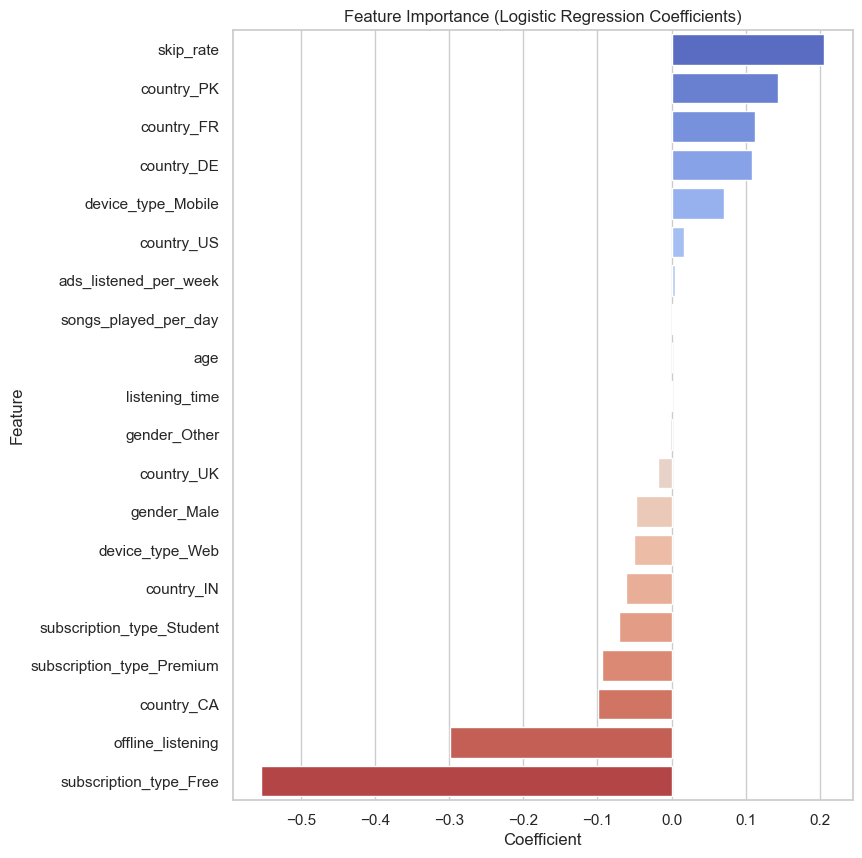

In [48]:
# Feature Importance (Coefficients)
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": log_reg.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(8,10))
sns.barplot(data=coeffs, x="Coefficient", y="Feature", palette="coolwarm")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()